In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [6]:
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
train_demo = pd.read_csv('../dataset/train_demographics.csv')
test_demo = pd.read_csv('../dataset/test_demographics.csv')

In [7]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"Train demographics shape: {train_demo.shape}")
print(f"Test demographics shape: {test_demo.shape}")

Train shape: (574945, 341)
Test shape: (107, 336)
Train demographics shape: (81, 8)
Test demographics shape: (2, 8)


In [8]:
print("Train dataset info:")
print(train_df.info())

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574945 entries, 0 to 574944
Columns: 341 entries, row_id to tof_5_v63
dtypes: float64(332), int64(1), object(8)
memory usage: 1.5+ GB
None


In [9]:
print("First few rows of training data:")
print(train_df.head())

First few rows of training data:
              row_id sequence_type sequence_id  sequence_counter      subject  \
0  SEQ_000007_000000        Target  SEQ_000007                 0  SUBJ_059520   
1  SEQ_000007_000001        Target  SEQ_000007                 1  SUBJ_059520   
2  SEQ_000007_000002        Target  SEQ_000007                 2  SUBJ_059520   
3  SEQ_000007_000003        Target  SEQ_000007                 3  SUBJ_059520   
4  SEQ_000007_000004        Target  SEQ_000007                 4  SUBJ_059520   

                       orientation                                   behavior  \
0  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
1  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
2  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
3  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
4  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target locati

In [11]:
gesture_counts = train_df['gesture'].value_counts()
print(gesture_counts)

gesture
Text on phone                                 58462
Neck - scratch                                56619
Eyebrow - pull hair                           44305
Forehead - scratch                            40923
Forehead - pull hairline                      40802
Above ear - pull hair                         40560
Neck - pinch skin                             40507
Eyelash - pull hair                           40218
Cheek - pinch skin                            40124
Wave hello                                    34356
Write name in air                             31267
Pull air toward your face                     30743
Feel around in tray and pull out an object    17114
Glasses on/off                                13542
Drink from bottle/cup                         13093
Scratch knee/leg skin                         12328
Write name on leg                             10138
Pinch knee/leg skin                            9844
Name: count, dtype: int64


In [12]:
sequence_type_counts = train_df['sequence_type'].value_counts()
print("Sequence type distribution:")
print(sequence_type_counts)

Sequence type distribution:
sequence_type
Target        344058
Non-Target    230887
Name: count, dtype: int64


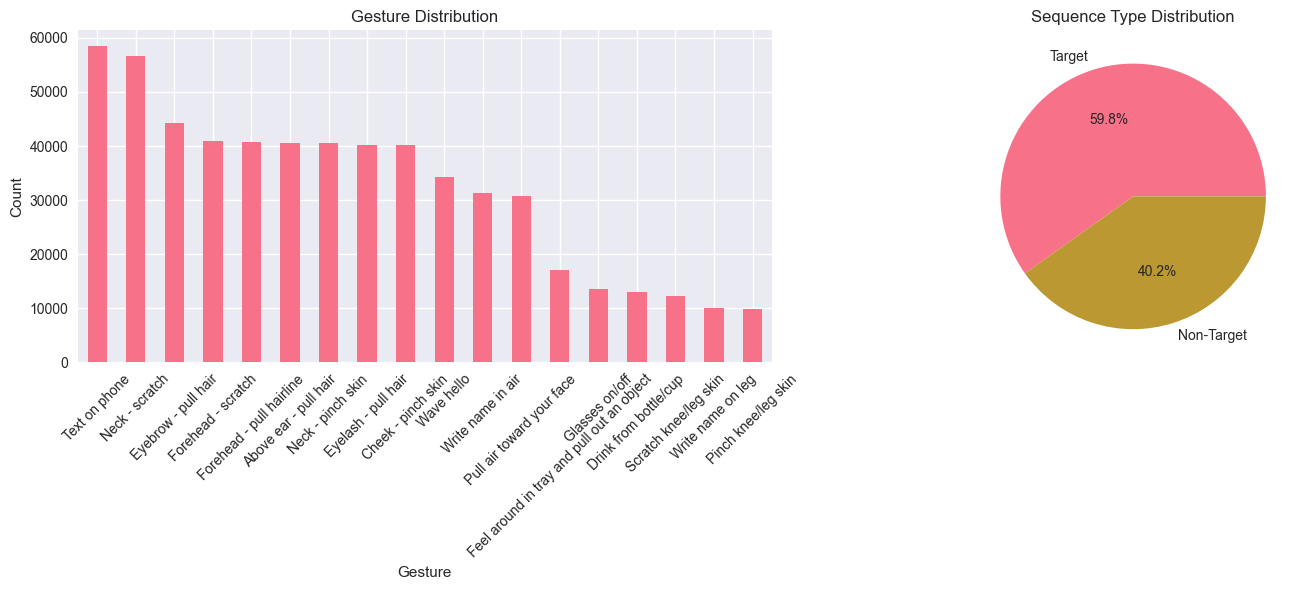

In [13]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
gesture_counts.plot(kind='bar', rot=45)
plt.title('Gesture Distribution')
plt.xlabel('Gesture')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sequence_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sequence Type Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [14]:
gesture_by_type = train_df.groupby(['sequence_type', 'gesture']).size().unstack(fill_value=0)
print("Gestures by sequence type:")
print(gesture_by_type)


Gestures by sequence type:
gesture        Above ear - pull hair  Cheek - pinch skin  \
sequence_type                                              
Non-Target                         0                   0   
Target                         40560               40124   

gesture        Drink from bottle/cup  Eyebrow - pull hair  \
sequence_type                                               
Non-Target                     13093                    0   
Target                             0                44305   

gesture        Eyelash - pull hair  \
sequence_type                        
Non-Target                       0   
Target                       40218   

gesture        Feel around in tray and pull out an object  \
sequence_type                                               
Non-Target                                          17114   
Target                                                  0   

gesture        Forehead - pull hairline  Forehead - scratch  Glasses on/off  \
sequence_t

In [15]:
unique_sequences = train_df['sequence_id'].nunique()
test_sequences = test_df['sequence_id'].nunique()
print(f"Number of unique sequences in train: {unique_sequences}")
print(f"Number of unique sequences in test: {test_sequences}")

Number of unique sequences in train: 8151
Number of unique sequences in test: 2


In [16]:
sequence_lengths = train_df.groupby('sequence_id').size()
print("Sequence length statistics:")
print(sequence_lengths.describe())

Sequence length statistics:
count    8151.000000
mean       70.536744
std        35.389879
min        29.000000
25%        51.000000
50%        59.000000
75%        78.000000
max       700.000000
dtype: float64


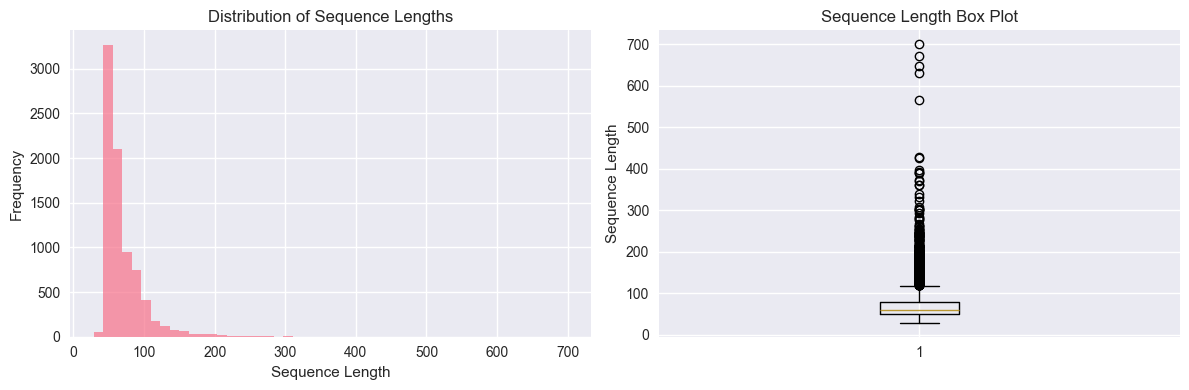

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(sequence_lengths, bins=50, alpha=0.7)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(sequence_lengths)
plt.title('Sequence Length Box Plot')
plt.ylabel('Sequence Length')

plt.tight_layout()
plt.show()

In [18]:
behavior_counts = train_df['behavior'].value_counts()
print("Behavior distribution:")
print(behavior_counts)

Behavior distribution:
behavior
Performs gesture                             255817
Moves hand to target location                156474
Hand at target location                       95173
Relaxes and moves hand to target location     67481
Name: count, dtype: int64


In [19]:
acc_cols = ['acc_x', 'acc_y', 'acc_z']
rot_cols = ['rot_w', 'rot_x', 'rot_y', 'rot_z']
thm_cols = [f'thm_{i}' for i in range(1, 6)]
tof_cols = [col for col in train_df.columns if col.startswith('tof_')]

In [20]:
print(f"Accelerometer columns: {len(acc_cols)}")
print(f"Rotation columns: {len(rot_cols)}")
print(f"Thermopile columns: {len(thm_cols)}")
print(f"Time-of-flight columns: {len(tof_cols)}")

Accelerometer columns: 3
Rotation columns: 4
Thermopile columns: 5
Time-of-flight columns: 320


In [21]:
print("Missing values analysis:")
print(f"Accelerometer missing: {train_df[acc_cols].isnull().sum().sum()}")
print(f"Rotation missing: {train_df[rot_cols].isnull().sum().sum()}")
print(f"Thermopile missing: {train_df[thm_cols].isnull().sum().sum()}")
print(f"Time-of-flight missing: {train_df[tof_cols].isnull().sum().sum()}")

Missing values analysis:
Accelerometer missing: 0
Rotation missing: 14768
Thermopile missing: 60607
Time-of-flight missing: 3522432


In [23]:
print("Accelerometer statistics:")
print(train_df[acc_cols].describe())

print("Rotation statistics:")
print(train_df[rot_cols].describe())

print("Thermopile statistics:")
print(train_df[thm_cols].describe())


Accelerometer statistics:
               acc_x          acc_y          acc_z
count  574945.000000  574945.000000  574945.000000
mean        1.639980       1.790704      -0.459811
std         5.781259       5.003945       6.096490
min       -34.585938     -24.402344     -42.855469
25%        -2.964844      -2.121094      -5.417969
50%         2.972656       0.695312      -1.562500
75%         6.343750       6.816406       5.164062
max        46.328125      27.183594      30.078125
Rotation statistics:
               rot_w          rot_x          rot_y          rot_z
count  571253.000000  571253.000000  571253.000000  571253.000000
mean        0.360375      -0.119916      -0.059953      -0.188298
std         0.225739       0.465520       0.543028       0.504137
min         0.000000      -0.999146      -0.999695      -0.998169
25%         0.180237      -0.456299      -0.511536      -0.627686
50%         0.340332      -0.186890      -0.112610      -0.263916
75%         0.503479       0.204

In [24]:
sample_sequence_id = train_df['sequence_id'].iloc[0]
sample_data = train_df[train_df['sequence_id'] == sample_sequence_id].copy()

print(f"Visualizing sample sequence: {sample_sequence_id}")
print(f"Gesture: {sample_data['gesture'].iloc[0]}")
print(f"Sequence type: {sample_data['sequence_type'].iloc[0]}")

Visualizing sample sequence: SEQ_000007
Gesture: Cheek - pinch skin
Sequence type: Target


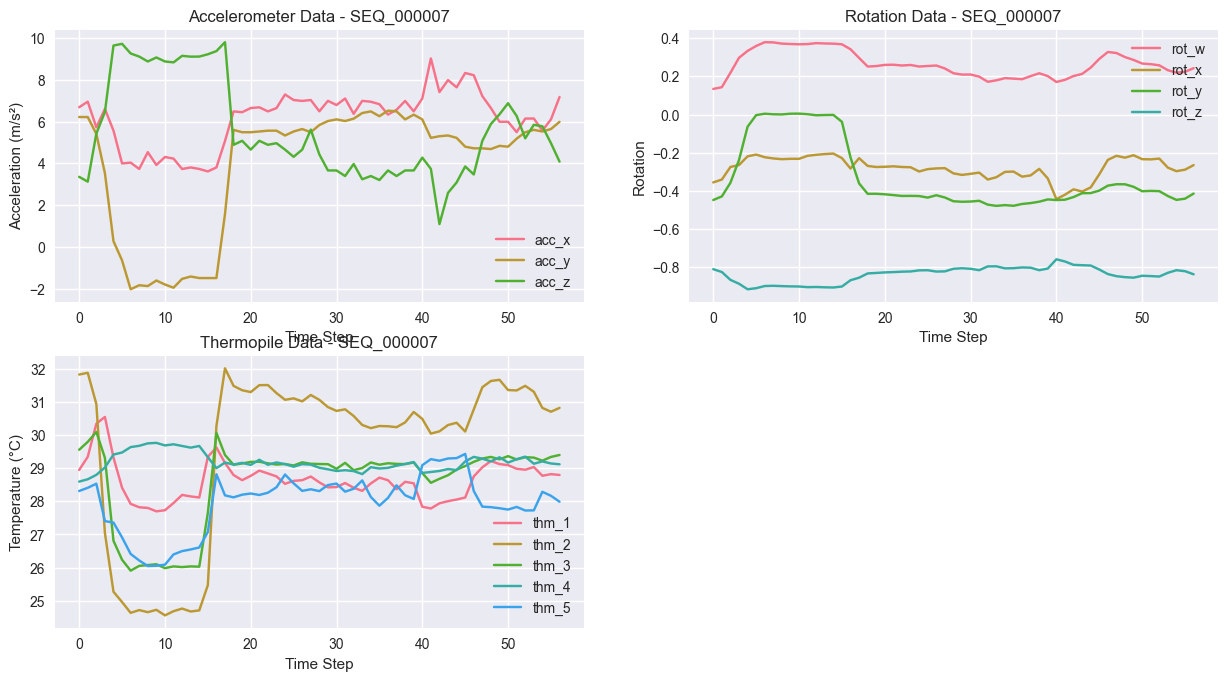

In [25]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
for col in acc_cols:
    plt.plot(sample_data['sequence_counter'], sample_data[col], label=col)
plt.title(f'Accelerometer Data - {sample_sequence_id}')
plt.xlabel('Time Step')
plt.ylabel('Acceleration (m/s²)')
plt.legend()

plt.subplot(3, 2, 2)
for col in rot_cols:
    plt.plot(sample_data['sequence_counter'], sample_data[col], label=col)
plt.title(f'Rotation Data - {sample_sequence_id}')
plt.xlabel('Time Step')
plt.ylabel('Rotation')
plt.legend()

plt.subplot(3, 2, 3)
for col in thm_cols:
    plt.plot(sample_data['sequence_counter'], sample_data[col], label=col)
plt.title(f'Thermopile Data - {sample_sequence_id}')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°C)')
plt.legend()

([<matplotlib.axis.YTick at 0x13bb366b6a0>,
 [Text(0, 0, 'Relaxes and moves hand to target location'),
  Text(0, 1, 'Hand at target location'),
  Text(0, 2, 'Performs gesture')])

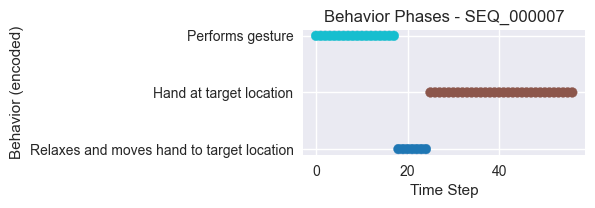

In [26]:
plt.subplot(3, 2, 4)
behaviors = sample_data['behavior'].unique()
behavior_encoder = LabelEncoder()
sample_data['behavior_encoded'] = behavior_encoder.fit_transform(sample_data['behavior'])
plt.scatter(sample_data['sequence_counter'], sample_data['behavior_encoded'], 
           c=sample_data['behavior_encoded'], cmap='tab10')
plt.title(f'Behavior Phases - {sample_sequence_id}')
plt.xlabel('Time Step')
plt.ylabel('Behavior (encoded)')
plt.yticks(range(len(behaviors)), behaviors)

Text(0, 0.5, 'Magnitude')

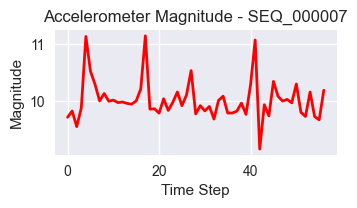

In [27]:
plt.subplot(3, 2, 5)
sample_data['acc_magnitude'] = np.sqrt(sample_data['acc_x']**2 + 
                                      sample_data['acc_y']**2 + 
                                      sample_data['acc_z']**2)
plt.plot(sample_data['sequence_counter'], sample_data['acc_magnitude'], 'r-', linewidth=2)
plt.title(f'Accelerometer Magnitude - {sample_sequence_id}')
plt.xlabel('Time Step')
plt.ylabel('Magnitude')

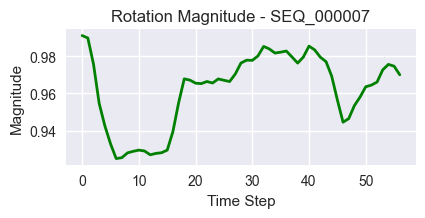

In [28]:
plt.subplot(3, 2, 6)
sample_data['rot_magnitude'] = np.sqrt(sample_data['rot_x']**2 + 
                                      sample_data['rot_y']**2 + 
                                      sample_data['rot_z']**2)
plt.plot(sample_data['sequence_counter'], sample_data['rot_magnitude'], 'g-', linewidth=2)
plt.title(f'Rotation Magnitude - {sample_sequence_id}')
plt.xlabel('Time Step')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

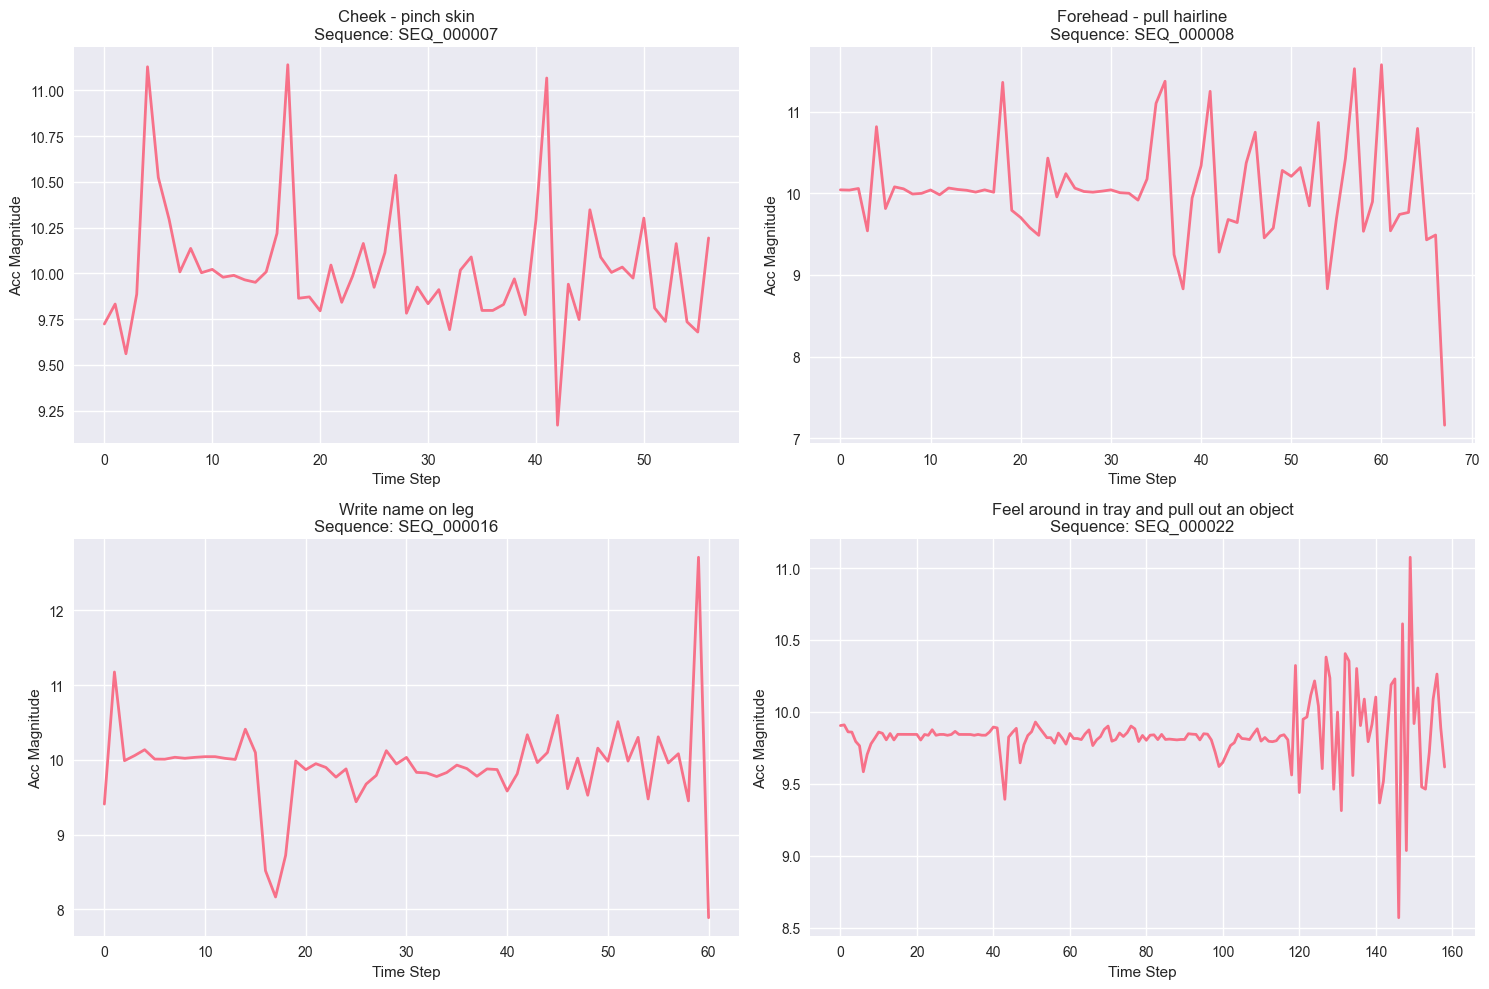

In [29]:
gestures_to_compare = train_df['gesture'].unique()[:4]  #first 4 gestures
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, gesture in enumerate(gestures_to_compare):
    gesture_data = train_df[train_df['gesture'] == gesture]
    sample_seq = gesture_data['sequence_id'].iloc[0]
    seq_data = gesture_data[gesture_data['sequence_id'] == sample_seq]
    
    # Plot accelerometer magnitude
    acc_mag = np.sqrt(seq_data['acc_x']**2 + seq_data['acc_y']**2 + seq_data['acc_z']**2)
    axes[i].plot(seq_data['sequence_counter'], acc_mag, linewidth=2)
    axes[i].set_title(f'{gesture}\nSequence: {sample_seq}')
    axes[i].set_xlabel('Time Step')
    axes[i].set_ylabel('Acc Magnitude')

plt.tight_layout()
plt.show()

In [31]:
print("DEMOGRAPHIC ANALYSIS")

print("Training demographics:")
print(train_demo.describe())
print()

print("Demographics distribution:")
print("Adult/Child distribution:")
print(train_demo['adult_child'].value_counts())
print()
print("Sex distribution:")
print(train_demo['sex'].value_counts())
print()
print("Handedness distribution:")
print(train_demo['handedness'].value_counts())
print()

DEMOGRAPHIC ANALYSIS
Training demographics:
       adult_child        age        sex  handedness   height_cm  \
count    81.000000  81.000000  81.000000   81.000000   81.000000   
mean      0.518519  21.814815   0.617284    0.876543  167.993827   
std       0.502770  10.289693   0.489078    0.331010   10.605863   
min       0.000000  10.000000   0.000000    0.000000  135.000000   
25%       0.000000  13.000000   0.000000    1.000000  163.000000   
50%       1.000000  22.000000   1.000000    1.000000  170.000000   
75%       1.000000  27.000000   1.000000    1.000000  174.000000   
max       1.000000  53.000000   1.000000    1.000000  190.500000   

       shoulder_to_wrist_cm  elbow_to_wrist_cm  
count             81.000000          81.000000  
mean              51.580247          25.469136  
std                4.888415           3.025254  
min               41.000000          18.000000  
25%               49.000000          24.000000  
50%               52.000000          25.000000  


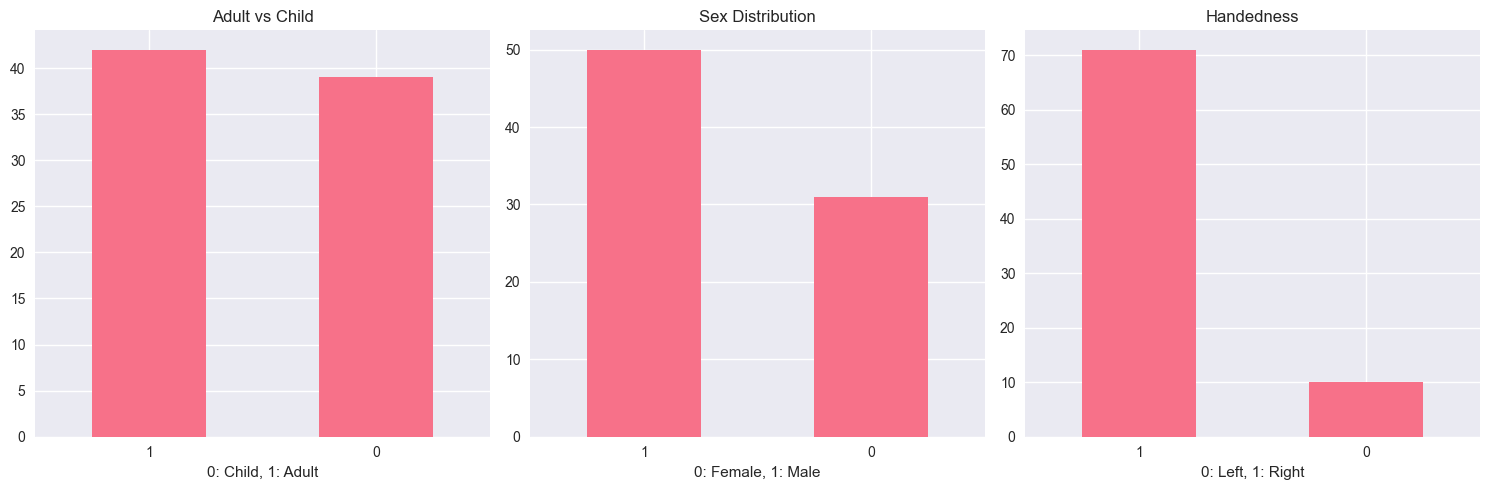

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
train_demo['adult_child'].value_counts().plot(kind='bar')
plt.title('Adult vs Child')
plt.xlabel('0: Child, 1: Adult')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
train_demo['sex'].value_counts().plot(kind='bar')
plt.title('Sex Distribution')
plt.xlabel('0: Female, 1: Male')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
train_demo['handedness'].value_counts().plot(kind='bar')
plt.title('Handedness')
plt.xlabel('0: Left, 1: Right')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


CORRELATION ANALYSIS


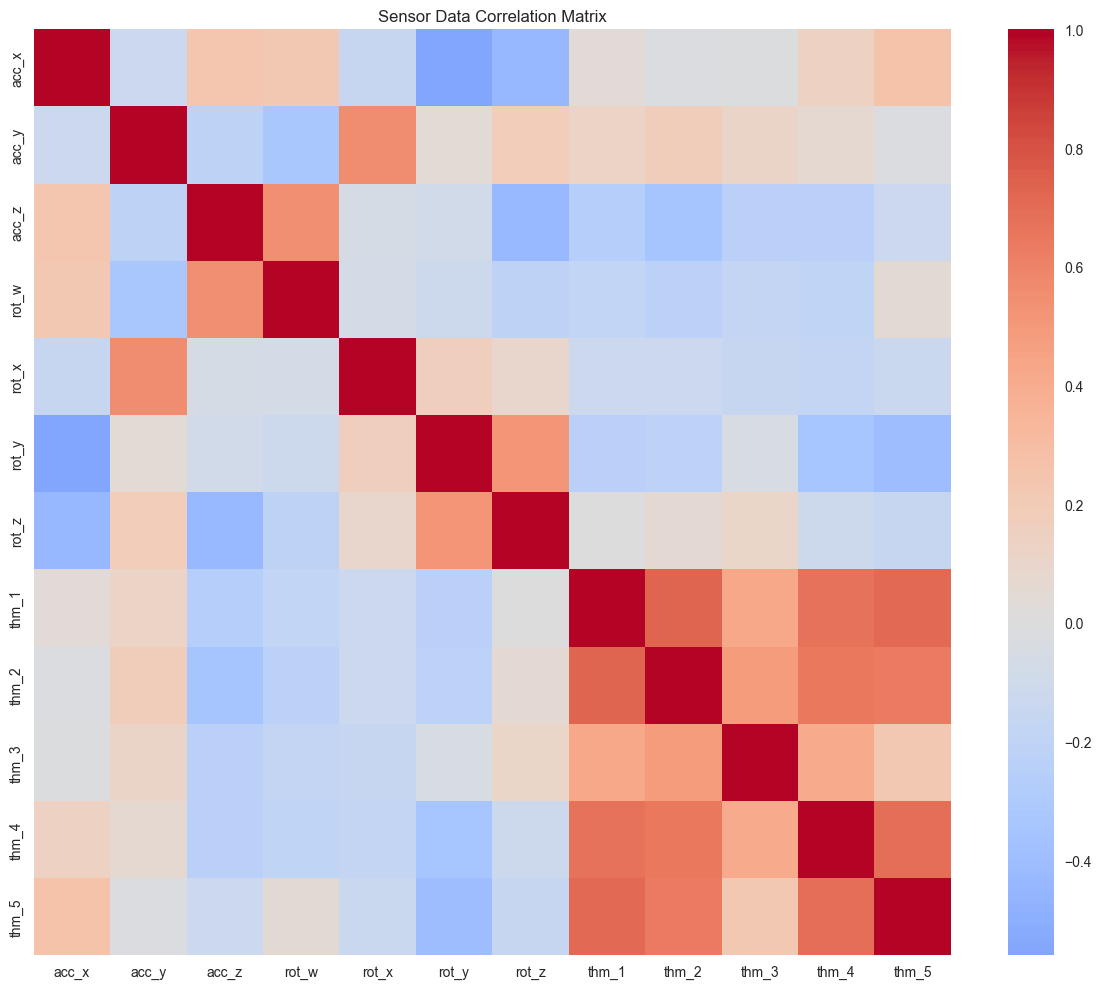

In [33]:
print("CORRELATION ANALYSIS")

#correlation matrix for sensor data
sensor_cols = acc_cols + rot_cols + thm_cols
correlation_matrix = train_df[sensor_cols].corr()

#correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Sensor Data Correlation Matrix')
plt.tight_layout()
plt.show()

TIME-OF-FLIGHT SENSOR ANALYSIS
Time-of-flight sensor statistics (first 8 pixels of sensor 1):
            tof_1_v0       tof_1_v1       tof_1_v2       tof_1_v3  \
count  568721.000000  568721.000000  568721.000000  568721.000000   
mean       54.591513      54.997108      56.233888      57.663855   
std        72.756604      73.209203      74.045765      74.668750   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%        -1.000000      -1.000000      -1.000000      -1.000000   
50%        -1.000000      -1.000000      -1.000000      -1.000000   
75%       104.000000     106.000000     110.000000     113.000000   
max       249.000000     249.000000     249.000000     249.000000   

            tof_1_v4       tof_1_v5       tof_1_v6       tof_1_v7  
count  568721.000000  568721.000000  568721.000000  568721.000000  
mean       58.766488      57.383394      56.358724      56.353711  
std        74.512695      72.857238      71.116937      70.139115  
min        -

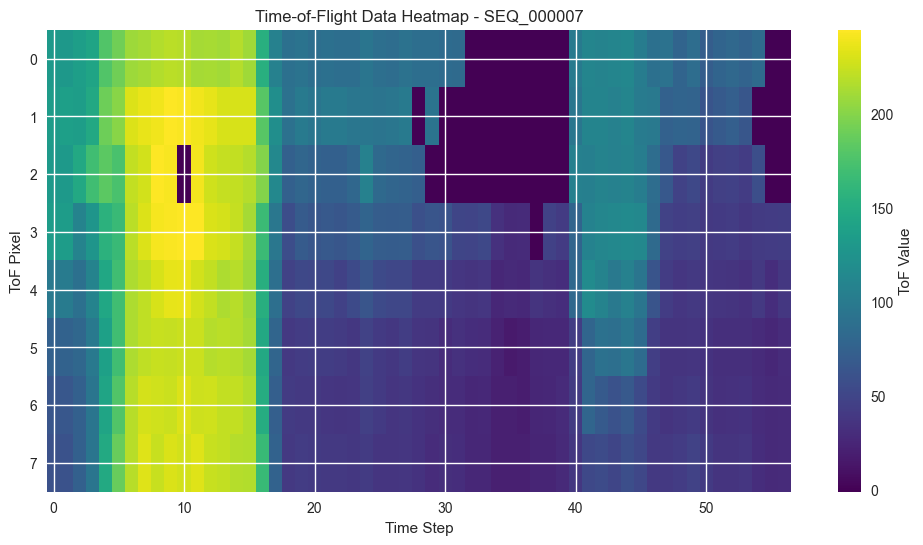

In [34]:
print("TIME-OF-FLIGHT SENSOR ANALYSIS")

#ToF sensors
tof_sample_cols = [f'tof_1_v{i}' for i in range(8)]  
tof_data = train_df[tof_sample_cols].copy()

print("Time-of-flight sensor statistics (first 8 pixels of sensor 1):")
print(tof_data.describe())
print()

tof_missing = (tof_data == -1).sum()
print("Number of -1 values (no response) per ToF pixel:")
print(tof_missing)
print()

sample_tof = train_df[train_df['sequence_id'] == sample_sequence_id][tof_sample_cols].values
if sample_tof.shape[0] > 0:
    plt.figure(figsize=(12, 6))
    plt.imshow(sample_tof.T, aspect='auto', cmap='viridis')
    plt.colorbar(label='ToF Value')
    plt.title(f'Time-of-Flight Data Heatmap - {sample_sequence_id}')
    plt.xlabel('Time Step')
    plt.ylabel('ToF Pixel')
    plt.show()

In [35]:
print(" DATA QUALITY ASSESSMENT")

duplicates = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

print("Sequence ID consistency check:")
seq_gesture_check = train_df.groupby('sequence_id')['gesture'].nunique()
inconsistent_sequences = seq_gesture_check[seq_gesture_check > 1]
print(f"Sequences with multiple gestures: {len(inconsistent_sequences)}")

missing_pct = (train_df.isnull().sum() / len(train_df)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
print("\nColumns with missing data (% missing):")
print(missing_pct.head(10))

 DATA QUALITY ASSESSMENT
Number of duplicate rows: 0
Sequence ID consistency check:
Sequences with multiple gestures: 0

Columns with missing data (% missing):
thm_5        5.789423
tof_5_v63    5.242588
tof_5_v24    5.242588
tof_5_v18    5.242588
tof_5_v19    5.242588
tof_5_v20    5.242588
tof_5_v21    5.242588
tof_5_v22    5.242588
tof_5_v23    5.242588
tof_5_v25    5.242588
dtype: float64
